In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:\\Users\\Miriana Albergo\\EpicodeP\\owid-covid-data.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387248,ZWE,Africa,Zimbabwe,2024-03-13,266359.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
387249,ZWE,Africa,Zimbabwe,2024-03-14,266359.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
387250,ZWE,Africa,Zimbabwe,2024-03-15,266359.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
387251,ZWE,Africa,Zimbabwe,2024-03-16,266359.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [24]:
"""Si richiede di verificare le dimensioni del dataset"""
dimensione = df.shape
print("La dimensione del dataset è", dimensione)

La dimensione del dataset è (387253, 67)


In [14]:
"""Si richiede di verificare i relativi metadati"""
metadati = df.dtypes
print(metadati)

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object


In [18]:
"""Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente"""
dati_continente = df.dropna(subset=['continent'])
casi_per_continente = dati_continente.groupby('continent')['total_cases'].sum()
print(casi_per_continente)

continent
Africa           1.277678e+10
Asia             2.099663e+11
Europe           2.013888e+11
North America    1.096626e+11
Oceania          9.506027e+09
South America    6.384417e+10
Name: total_cases, dtype: float64


In [19]:
#Cambio formato per rendere i dati più leggibili
pd.options.display.float_format = '{:,.0f}'.format
print(casi_per_continente)

continent
Africa           12,776,779,335
Asia            209,966,253,167
Europe          201,388,821,111
North America   109,662,596,619
Oceania           9,506,027,179
South America    63,844,167,999
Name: total_cases, dtype: float64


In [23]:
"""Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente)"""
#Definisco le variabili
continente_1 = 'Asia'
continente_2 = 'Europe'

#Calcolo il numero dei casi totali dei due continenti
casi_continente_1 = df.loc[df['continent'] == continente_1, 'total_cases']
casi_continente_2 = df.loc[df['continent'] == continente_2, 'total_cases']

#Calcolo valore massimo dei casi per i due continenti
valore_massimo_continente_1 = round(casi_continente_1.max(), 2)
valore_massimo_continente_2 = round(casi_continente_2.max(), 2)

#Calcolo della media dei casi per i due continenti
media_continente_1 = round(casi_continente_1.mean(), 2)
media_continente_2 = round(casi_continente_2.mean(), 2)

#Calcolo numero totale dei casi nel mondo
casi_totali_nel_mondo = df['total_cases'].sum()

# Calcolo la percentuale di casi rispetto al numero totale di casi nel mondo per i due continenti
percentuale_continente_1 = round((casi_continente_1.sum() / casi_totali_nel_mondo) * 100, 2)
percentuale_continente_2 = round((casi_continente_2.sum() / casi_totali_nel_mondo) * 100, 2)

print("Valore massimo per", continente_1, ":", valore_massimo_continente_1)
print("Valore massimo per", continente_2, ":", valore_massimo_continente_2)
print("Media per", continente_1, ":", media_continente_1)
print("Media per", continente_2, ":", media_continente_2)
print("Percentuale rispetto ai casi totali nel mondo per", continente_1, ":", percentuale_continente_1, "%")
print("Percentuale rispetto ai casi totali nel mondo per", continente_2, ":", percentuale_continente_2, "%")





Valore massimo per Asia : 99343195.0
Valore massimo per Europe : 38997490.0
Media per Asia : 3183043.07
Media per Europe : 2669240.02
Percentuale rispetto ai casi totali nel mondo per Asia : 8.16 %
Percentuale rispetto ai casi totali nel mondo per Europe : 7.83 %


(18993.0, 19357.0)

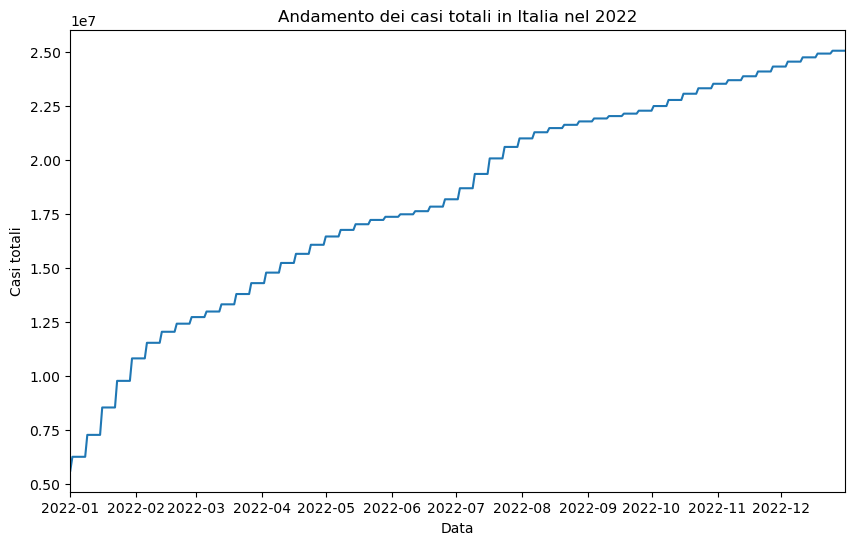

In [49]:
"""Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali"""
# Filtro i dati relativi all'Italia nel 2022
dati_italia_2022 = df[(df['location'] == 'Italy') & (df['date'].str.startswith('2022'))]

#Converto colonna date in formato datetime
dati_italia_2022.loc[:, 'date'] = pd.to_datetime(dati_italia_2022['date'])

# Grafico dell'andamento dei casi totali rispetto alla data
plt.figure(figsize=(10, 6))
plt.plot(dati_italia_2022['date'], dati_italia_2022['total_cases'])
plt.title('Andamento dei casi totali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi totali')
plt.xlim(dati_italia_2022['date'].iloc[0], dati_italia_2022['date'].iloc[-1])



(18993.0, 19357.0)

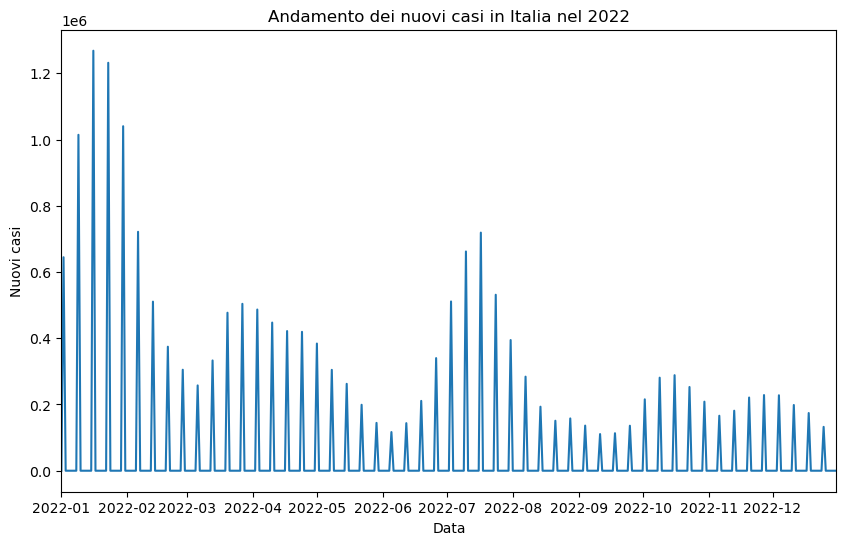

In [67]:
#Grafico dei nuovi casi rispetto alla data
plt.figure(figsize=(10, 6))
plt.plot(dati_italia_2022['date'], dati_italia_2022['new_cases'])
plt.title('Andamento dei nuovi casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi casi')
plt.xlim(dati_italia_2022['date'].iloc[0], dati_italia_2022['date'].iloc[-1])



(18993.0, 19357.0)

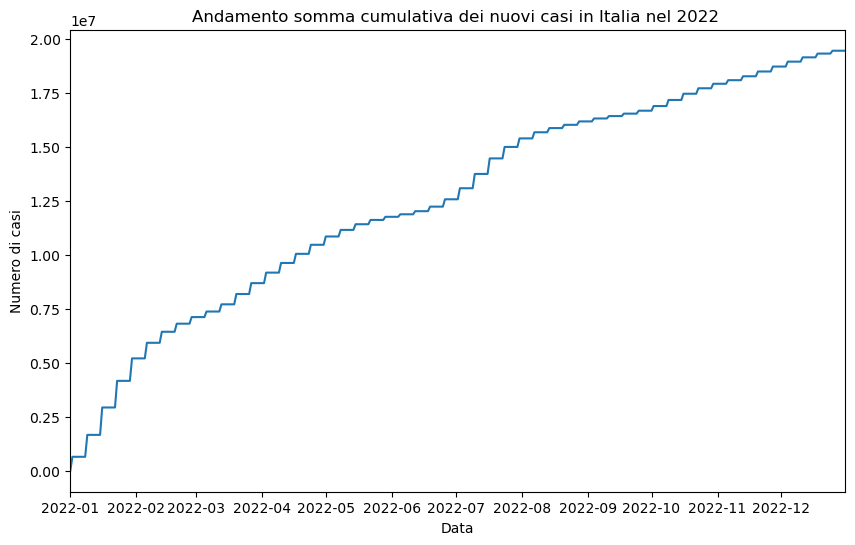

In [68]:
# Calcolo la somma cumulativa dei nuovi casi nel 2022
cumulative_new_cases = dati_italia_2022['new_cases'].cumsum()

#Grafico dell'andamento della somma cumulativa dei nuovi casi
plt.figure(figsize=(10, 6))
plt.plot(dati_italia_2022['date'], cumulative_new_cases, label='Somma cumulativa dei nuovi casi')
plt.title('Andamento somma cumulativa dei nuovi casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Numero di casi')
plt.xlim(dati_italia_2022['date'].iloc[0], dati_italia_2022['date'].iloc[-1])




(18993.0, 19357.0)

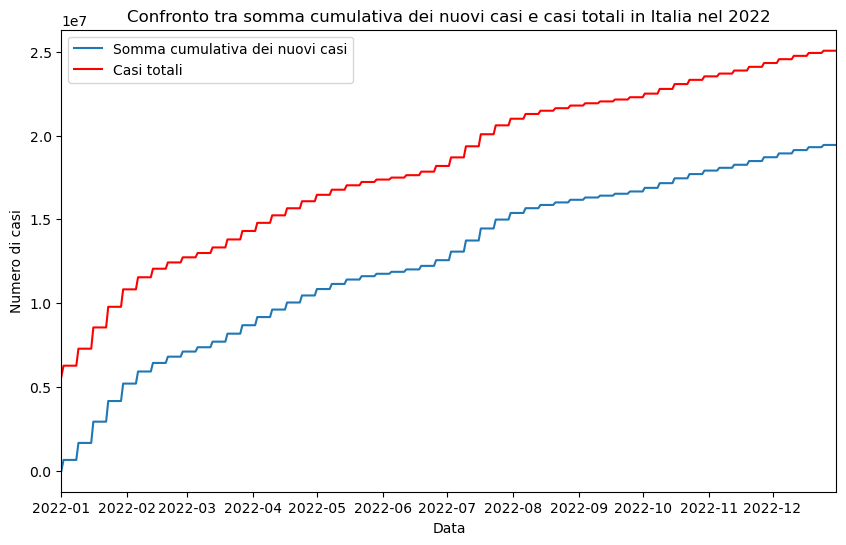

In [72]:
#Grafico dell'andamento della somma cumulativa dei nuovi casi e dei casi totali rispetto alla data
plt.figure(figsize=(10, 6))
plt.plot(dati_italia_2022['date'], cumulative_new_cases, label='Somma cumulativa dei nuovi casi')
plt.plot(dati_italia_2022['date'], dati_italia_2022['total_cases'], color='red', label='Casi totali')
plt.title('Confronto tra somma cumulativa dei nuovi casi e casi totali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Numero di casi')
plt.legend()
plt.xlim(dati_italia_2022['date'].iloc[0], dati_italia_2022['date'].iloc[-1])

Ci sono similarità tra l'andamento della somma cumulativa dei nuovi casi e l'andamento dei casi totali perchè le due linee seguono una traiettoria simile nel grafico nel corso del tempo, quindi possiamo dedurre che c'è una correlazione tra i nuovi casi giornalieri e i casi totali.

Text(0, 0.5, 'Numero di pazienti in terapia intensiva (ICU)')

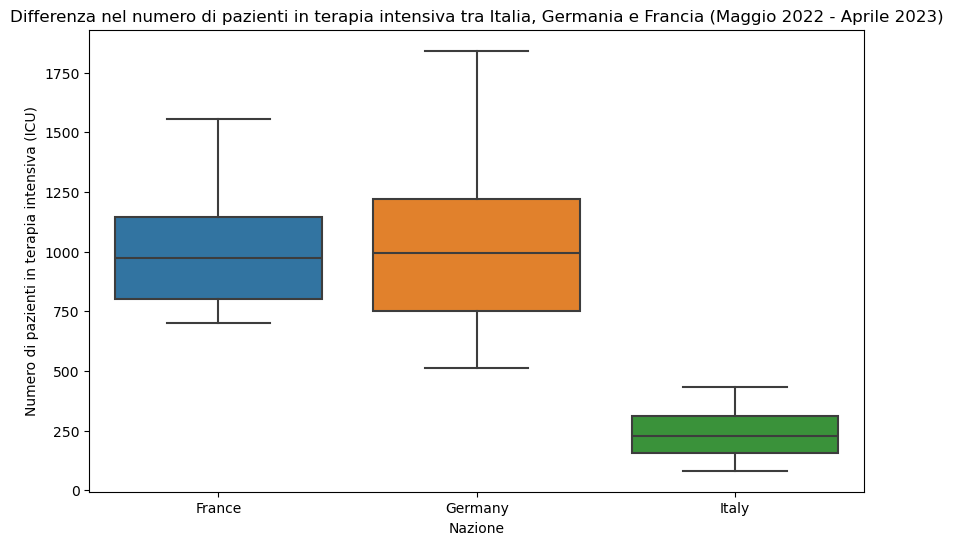

In [110]:
"""Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo"""
# Filtro i dati per le nazioni specificate e il periodo specificato
dati_icu = df[(df['location'].isin(['Italy', 'Germany', 'France'])) & (df['date'] >= '2022-05-01') & (df['date'] <= '2023-04-30') &
           (df['icu_patients'].notnull())]

#Boxplot della differenza nel numero di pazienti in terapia intensiva per le nazioni specificate
plt.figure(figsize=(10, 6))
sns.boxplot(data=dati_nazioni, x='location', y='icu_patients')
plt.title('Differenza nel numero di pazienti in terapia intensiva tra Italia, Germania e Francia (Maggio 2022 - Aprile 2023)')
plt.xlabel('Nazione')
plt.ylabel('Numero di pazienti in terapia intensiva (ICU)')

In questo grafico possiamo vedere come la mediana dell'Italia sia più bassa rispetto a quello dalla Francia e della Germania che,invece, hanno una mediana simile. Si può notare come la Germania abbia la distribuzione maggiore tra le tre nazioni, mentre l'Italia ha la distribuzione minore. I boxplot non mostrano outliers, cioè valori anomali in nessuna delle tre nazioni. 

In [111]:
"""Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna- se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno"""
#Filtro i dati per le nazioni specificate e per l'anno 2023
dati_ospedalizzati_2023 = df[(df['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) &  (df['date'].str.startswith('2023'))]

#Conto il numero di valori nulli nella colonna 'hosp_patients'
valori_nulli = dati_ospedalizzati_2023['hosp_patients'].isnull().sum()
print(valori_nulli)

# Calcolo la somma dei pazienti ospedalizzati per ciascuna nazione nel 2023
somma_ospedalizzati_per_nazione = dati_ospedalizzati_2023.groupby('location')['hosp_patients'].sum()
somma_ospedalizzati_per_nazione


843


location
France    1,382,574
Germany           0
Italy     1,175,272
Spain       354,602
Name: hosp_patients, dtype: float64

Text(0, 0.5, 'Somma dei pazienti ospedalizzati')

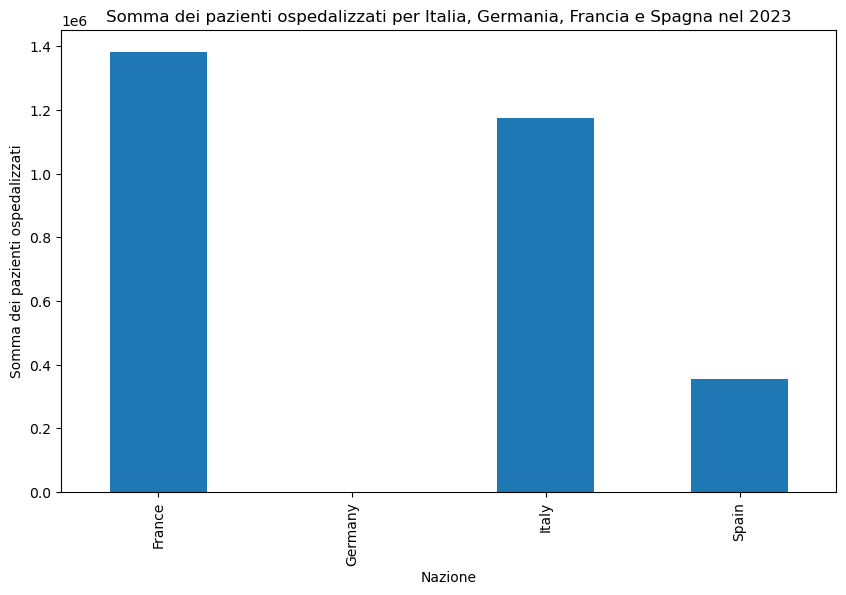

In [97]:
# Creo il grafico a barre della somma dei pazienti ospedalizzati per ogni nazione nel 2023
plt.figure(figsize=(10, 6))
somma_ospedalizzati_per_nazione.plot(kind='bar')
plt.title('Somma dei pazienti ospedalizzati per Italia, Germania, Francia e Spagna nel 2023')
plt.xlabel('Nazione')
plt.ylabel('Somma dei pazienti ospedalizzati')


Il paese Germania ha tutti dati mancanti nella colonna 'hosp_patients'. Si potrebbero sostuire questi dati per imputazione con media, mediana o un valore stimato prendendo in considerazione altri dati per la Germania nello stesso periodo. Però se non ci sono dati per questo paese e stesso periodo, si potrebbe pensare di eliminare le righe, se i dati non sono rilevanti per l'analisi.
